## Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset with molecular descriptor features

In [33]:
data = pd.read_csv("ML_ready.csv")

In [34]:
data.head()

,MolLogP,MolWt,RotatableBonds,AromaticProportion,LogS(mol/L)
0,2.5954,167.850,0,0.0,-2.18
1,2.3765,133.405,0,0.0,-2.00
2,2.5938,167.850,1,0.0,-1.74
3,2.0289,133.405,1,0.0,-1.48
4,2.9189,187.375,1,0.0,-3.04


In [35]:
data.shape

(1144, 5)

In [36]:
data.isna().sum()

MolLogP               0
MolWt                 0
RotatableBonds        0
AromaticProportion    0
LogS(mol/L)           0
dtype: int64

### Splitting the data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train , test = train_test_split( data, test_size=0.2,random_state = 42 )

In [39]:
print(train.shape)
print(test.shape)

(915, 5)
(229, 5)


## Analysing the dataset

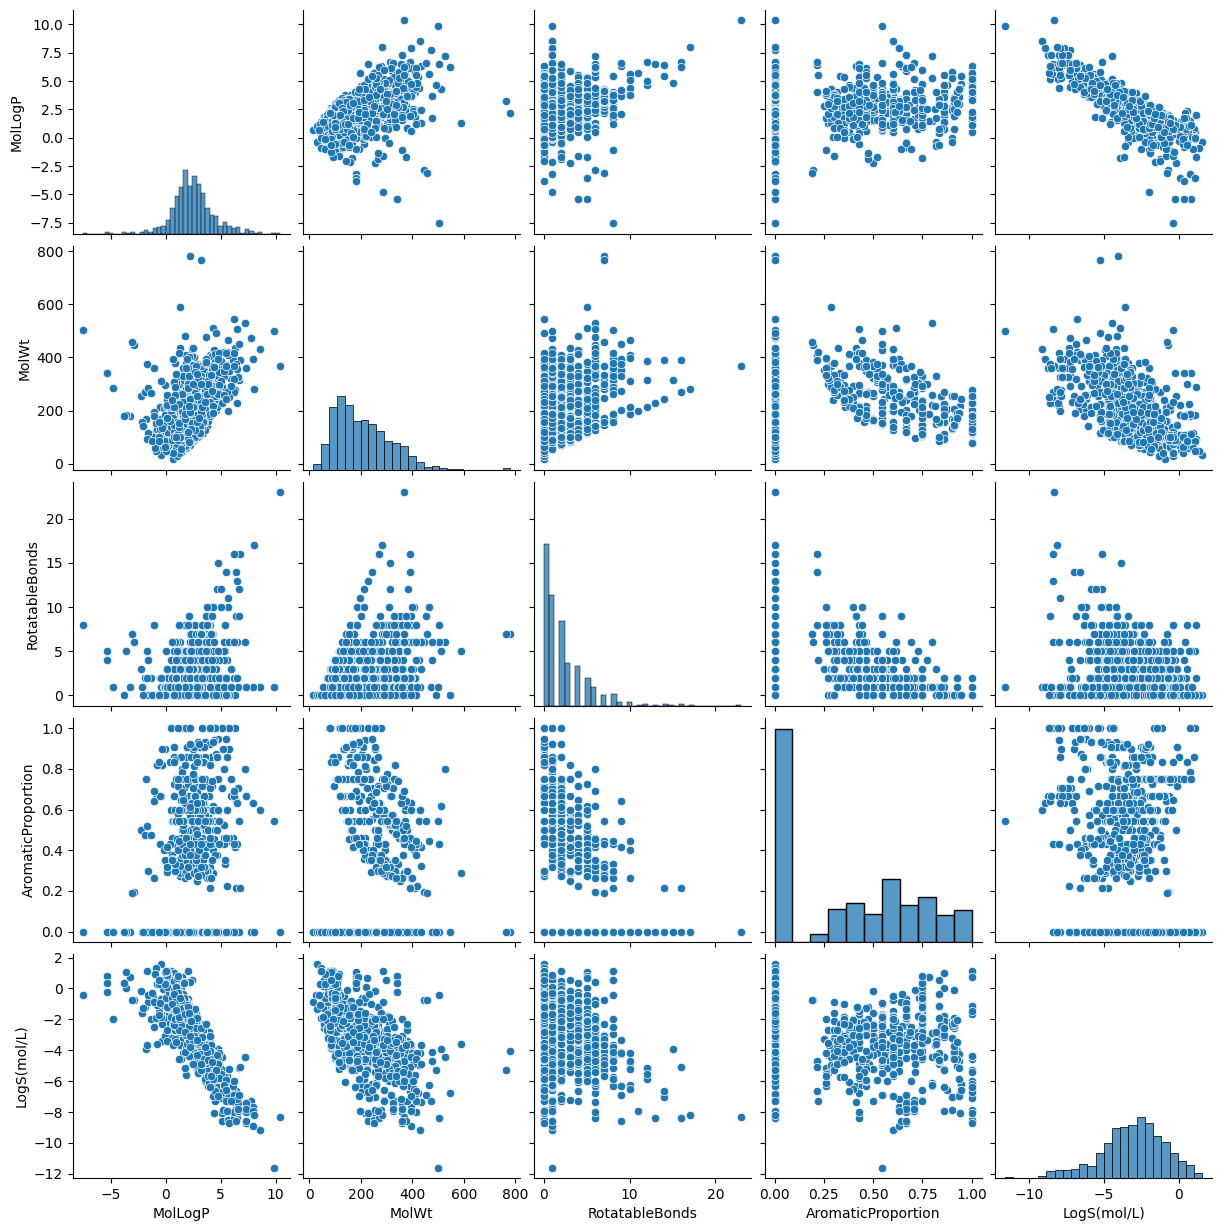

In [40]:
sns.pairplot(train)
plt.show()

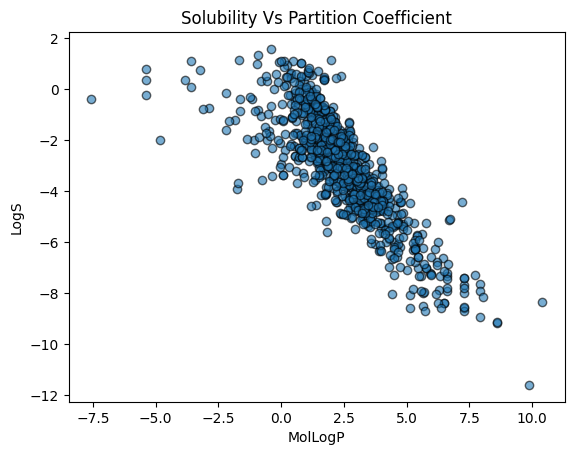

In [41]:
plt.scatter(train['MolLogP'], train['LogS(mol/L)'], alpha = 0.6, edgecolor = "black")
plt.xlabel('MolLogP')
plt.ylabel('LogS')
plt.title('Solubility Vs Partition Coefficient')
plt.show()

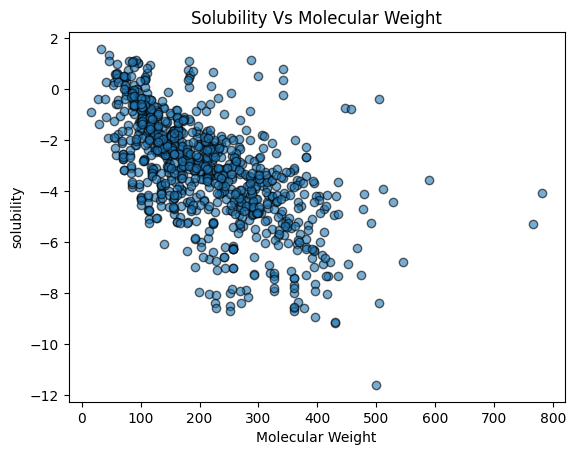

In [42]:
plt.scatter(train['MolWt'], train['LogS(mol/L)'], alpha = 0.6, edgecolor = "black")
plt.xlabel('Molecular Weight')
plt.ylabel('solubility')
plt.title('Solubility Vs Molecular Weight')
plt.show()

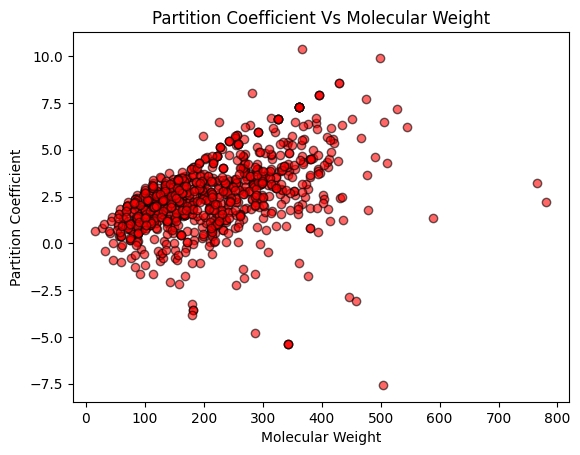

In [43]:
plt.scatter(train['MolWt'], train['MolLogP'], alpha = 0.6, color = "red", edgecolor = "black")
plt.xlabel('Molecular Weight')
plt.ylabel('Partition Coefficient')
plt.title('Partition Coefficient Vs Molecular Weight')
plt.show()

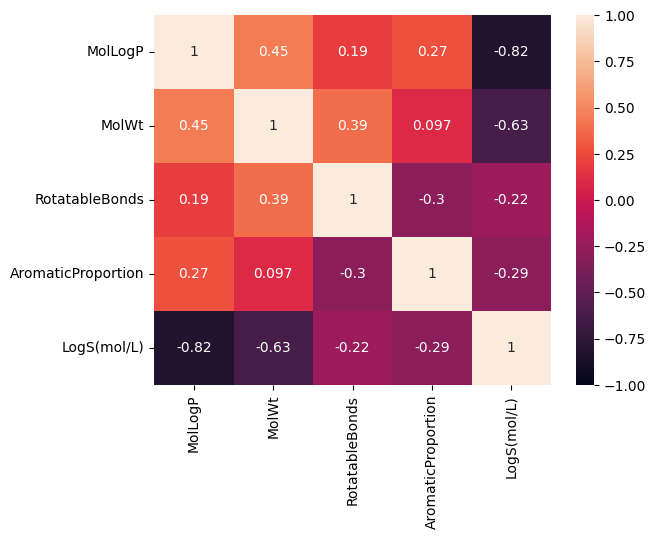

In [44]:
corr = train.corr()
sns.heatmap(corr, annot = True, vmin = -1)
plt.show()

In [45]:
corr['LogS(mol/L)']

MolLogP              -0.823371
MolWt                -0.629536
RotatableBonds       -0.223739
AromaticProportion   -0.289438
LogS(mol/L)           1.000000
Name: LogS(mol/L), dtype: float64

The various scatter plots, along with the correlation chart implies strong correlation between Molecular Weight and Log of Partition coefficient (LogP), while both of these have good negative correlation with the Log of Solubility values

In [46]:
## Separating Features and target

In [47]:
train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [48]:
print("train x : \n", train_x.head())
print("train y : \n",train_y.head())
print("test x : \n",test_x.head())
print("test y : \n",test_y.head())

train x : 
       MolLogP    MolWt  RotatableBonds  AromaticProportion
643    3.6126  296.410               0            0.272727
722    6.4876  226.448              13            0.000000
570    3.1538  284.746               1            0.600000
66     0.7788   74.123               2            0.000000
1002   1.8214  102.177               3            0.000000
train y : 
 643    -4.300
722    -8.400
570    -3.754
66      0.000
1002   -1.340
Name: LogS(mol/L), dtype: float64
test x : 
      MolLogP    MolWt  RotatableBonds  AromaticProportion
218  1.55740  102.177               3            0.000000
809  5.20590  345.653               4            0.571429
501  4.18090  339.218               4            0.545455
649  2.05760  286.349               4            0.315789
323  0.72822  146.153               0            0.909091
test y : 
 218   -0.890
809   -6.890
501   -4.530
649   -3.420
323   -0.466
Name: LogS(mol/L), dtype: float64


### Liner Regression Model

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [50]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(train_x, train_y)
pred_mod1 = model1.predict(test_x)

In [51]:
mean_squared_error(test_y, pred_mod1)

0.9990844407075307

In [52]:
r2_lin = r2_score(test_y, pred_mod1)
r2_lin

0.7705650058569231

### Decision Tree Regressor 

In [53]:
from sklearn.tree import DecisionTreeRegressor 
model2 = DecisionTreeRegressor()
model2.fit(train_x, train_y)
pred_mod2 = model2.predict(test_x)

In [54]:
r2_dt = r2_score(test_y, pred_mod2)
r2_dt

0.7471793460465073

### K nearest Neighbors Regressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
model3.fit(train_x, train_y)
pred_mod3 = model3.predict(test_x)

In [56]:
r2_knn = r2_score(test_y, pred_mod3)
r2_knn

0.6620576269888432

### Ridge Regressor

In [57]:
from sklearn.linear_model import Ridge
model4 = Ridge(alpha = 0.1)
model4.fit(train_x, train_y)
pred_mod4 = model4.predict(test_x)

In [58]:
r2_ridge = r2_score(test_y, pred_mod4)
r2_ridge

0.7705728305290627

### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor()
model5.fit(train_x, train_y)
pred_mod5 = model5.predict(test_x)

In [60]:
r2_rf = r2_score(test_y, pred_mod5)
r2_rf

0.8844962352453586

In [61]:
r2 = [r2_lin, r2_dt, r2_knn, r2_ridge, r2_rf]
model = ["Linear Reg", "Decision Tree", "K N N", "Ridge Reg", "Random Forest"]

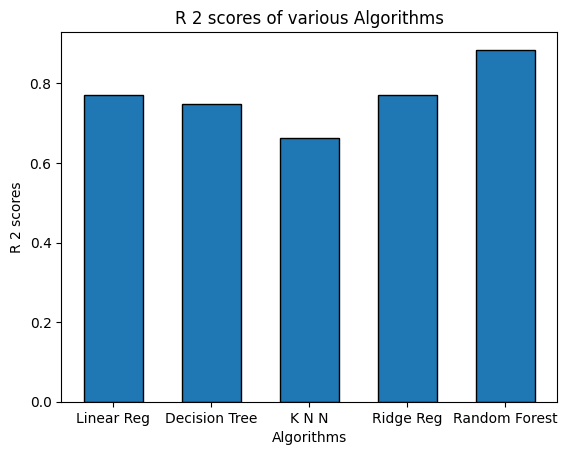

In [62]:
plt.bar(model, r2, width = 0.6, edgecolor = "black")
plt.title("R 2 scores of various Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("R 2 scores")
plt.show()

The Random Forest regressor has the highest R 2 score and therefore is selected for the model

In [ ]:
### Hyper parameter tuning

In [63]:
import pickle
pickle.dump(model5, open('solubility_model.pkl','wb'))